## Etivity 2 - Data preparation & Can we learn?
### Student ID: 18195067
### Student Name: Abhijit Sinha

In [1]:
# Importing Modules
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

In [2]:
# Importing Dataset and using the first column as the index
df = pd.read_csv("./bank_et2.csv")

# Remove the redundant column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [5]:
# Check the summary of categorical attributes
df.describe(include=np.object)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,yes
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


## Task 1 (CS5062)
Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [6]:
# Check for null values
df.isnull().sum() #.sort_values(ascending=False)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

#### There is missing data in the following features:
    - age      : 12 missing
    - job      : 10 missing
    - education: 104 missing
    - contact  : 191 missing
    - poutcome : 454 missing

### Handling missing values for AGE

In [7]:
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [8]:
# Lets analyse the data samples with missing age values
df[df['age'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


- We can see that the customers who's age is missing are either `married or single` and none of the divorced customers age is missing.

##### Attribute "age" can be related to the attributes "job" and "marital" status. 

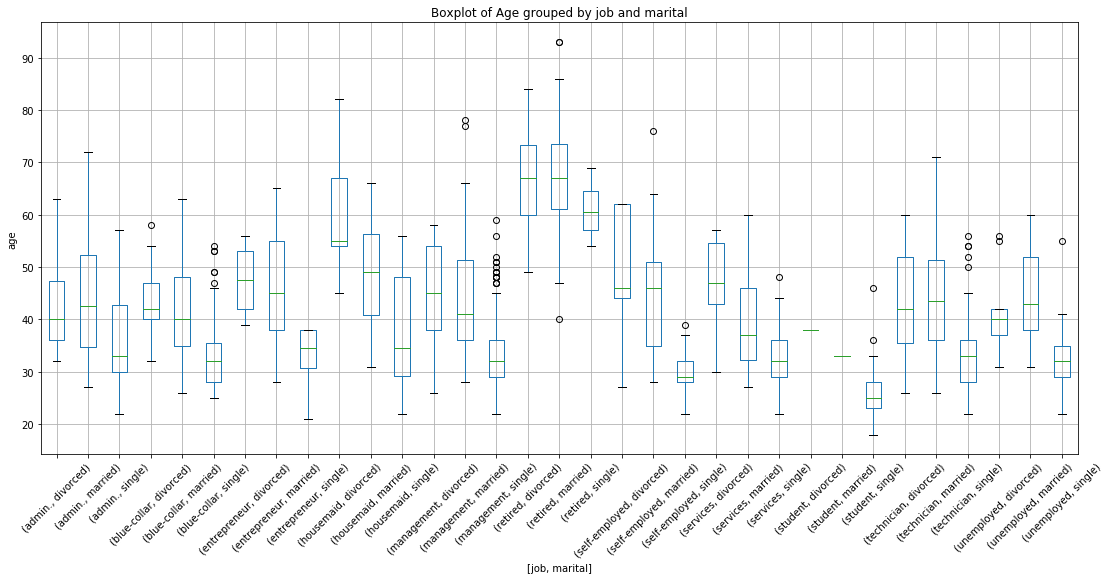

In [9]:
df.boxplot(column='age', by=['job', 'marital'], rot=45, figsize=(18,8))

plt.title("Boxplot of Age grouped by job and marital")
plt.ylabel("age")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.show()

We can see some variation in the median of `age` for each group and these medians can be used for imputing the missing values in each group after ensuring there is no missing values for `job` and `marital` attributes.

We know that there is **no missing values for marital status** but **attribute "job" has some missing values** which needs to be handled

### Handling missing value for attribute JOB

In [10]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [11]:
# Lets analyse the dataframe with missing JOB values
df[df['job'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,42.0,NaN,single,primary,no,2398,-1.418888,1.809977,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,46.0,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
831,41.0,NaN,single,primary,no,2398,-0.243804,-0.685437,yes,no,NaN,8,may,287,2,-1,0,NaN,no
1223,55.0,NaN,married,secondary,no,2206,-1.134511,0.861389,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,50.0,NaN,married,NaN,no,558,-0.455001,1.595412,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,54.0,NaN,married,secondary,no,2206,-0.575645,-0.242814,no,no,cellular,13,may,260,1,91,4,success,yes
1711,77.0,NaN,married,NaN,no,397,-0.871514,0.134782,no,no,telephone,7,may,300,3,-1,0,NaN,yes
1801,28.0,NaN,single,NaN,no,326,0.298961,1.653248,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,48.0,NaN,single,NaN,no,1819,0.680564,-0.786048,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,45.0,NaN,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


#### Job has 10 missing values and 11 categories. There are a few options I had thought for this situation:
1. Drop the 10 missing values as few (5 out of 10) of the missing job also has missing education field
2. Use forward or backward fill method (Chells also suggested this), but there is no statistical relation and it would be random fills.
3. Create a new category named `unknown`. However, we already have 11 categories and this will just add to it with no relevance to other features. 

##### Method used: Drop the missing job fields.

In [12]:
# There are Only 10 missing values in Job and we can drop it.
df.dropna(subset=['job'], inplace=True)

# Reset the index of rows
df.reset_index(drop=True, inplace=True)

In [13]:
# create a pivot table, which contains the median values for all the marital and job groups.
table_age = df.pivot_table(values='age', 
                       index='marital', 
                       columns='job', 
                       aggfunc=np.median)
print(table_age)

job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                       
divorced    40.0         42.0          47.5       55.0        45.0     67.0   
married     42.5         40.0          45.0       49.0        41.0     67.0   
single      33.0         32.0          34.5       34.5        32.0     60.5   

job       self-employed  services  student  technician  unemployed  
marital                                                             
divorced           46.0      47.0     38.0        42.0        40.0  
married            46.0      37.0     33.0        43.5        43.0  
single             29.0      32.0     25.0        33.0        32.0  


In [14]:
# Define function to return an element of the pivot table
def func_age(x):
    return table_age.loc[x['marital'], x['job']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(func_age, axis=1), inplace=True)

In [15]:
# Verify if null values in age are gone
df['age'].isnull().sum()

0

### Handling missing values for Education

In [16]:
# Find missing values for attribute Education
df['education'].isnull().sum()

99

After removing the missing job samples we are left with 99 missing education fields from the previous 104, as there was some overlap in the missing values between the 2 attributes

In [17]:
# Education properties
df['education'].value_counts(normalize=True)
df.education.shape[0]

1990

In [18]:
# Job vs Education
pd.crosstab(df.job, df.education, margins=True).style.background_gradient(cmap='autumn_r')

education,primary,secondary,tertiary,All
job,,,,
admin.,10,194,35,239
blue-collar,93,185,10,288
entrepreneur,4,18,22,44
housemaid,16,12,7,35
management,9,38,391,438
retired,53,77,22,152
self-employed,0,15,47,62
services,12,135,11,158
student,4,59,16,79


We can see from the above table that **job has a significant impact on the education** field. Most of the admin people have secondary education and management people have tertiary education and so on.

I will use the max id for education per job and fill the missing values.

In [19]:
# Find the missing education w.r.t job field
# Return index of first occurrence of maximum over requested axis

education_by_job = pd.crosstab(df['education'], df['job']).idxmax(axis=0)

print(education_by_job)

job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
dtype: object


In [20]:
def func_education(x):
    return education_by_job.loc[x['job']]

# Replace missing values of education with max chances of job-with-education
df['education'].fillna(df[df['education'].isnull()].apply(func_education, axis=1), inplace=True)

In [21]:
# Verify if null values in education are gone
df['education'].isnull().sum()

0

### Handling missing values for Contact

In [22]:
# Find missing values for attribute contact
df['contact'].isnull().sum()

190

In [23]:
# contact category values
df['contact'].value_counts(normalize=True)

cellular     0.919444
telephone    0.080556
Name: contact, dtype: float64

**Since 92% of the values are “cellular”**, it is safe to **impute the missing values as “cellular”** as there is a high probability of guessing correctly. We might be adding bias to the dataset with this approach though!

In [24]:
# Fill missing Contact values with "cellular"
df['contact'].fillna('cellular', inplace=True)

### Handling missing values for poutcome 

In [25]:
# Find missing values for attribute poutcome
df['poutcome'].isnull().sum()

451

Create a  **new category** for the missing data in `poutcome`. This can yield some new insights and could potentially be useful when building our model 

In [26]:
# Impute missing values as new catrgory "unknown"
df.loc[df['poutcome'].isnull(), 'poutcome'] = "unknown"

df.poutcome.unique()

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [27]:
# Sanity Check for null values
print(df.isnull().sum())
print(df.shape)

age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64
(1990, 19)


All the missing values has been handled and we have a bank dataframe with 1990 rows and 19 columns

*************************************

# Task 2 (CS5062)

*Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.*

An outlier is an unlikely observation in a dataset.Methods used to detect outliers:
- Analyzing the distribution using `Histogram`
- Analyzing the Inter-Quartile Range using `Box-Plots`

While the above methods give a visual feel we can get the exact number of Outliers and their values using the following:
- The Tukey's Inter-Quartile Range can be used to identify outliers in data regardless of the distribution
- The standard deviation can be used to identify outliers in Gaussian or Gaussian-like data

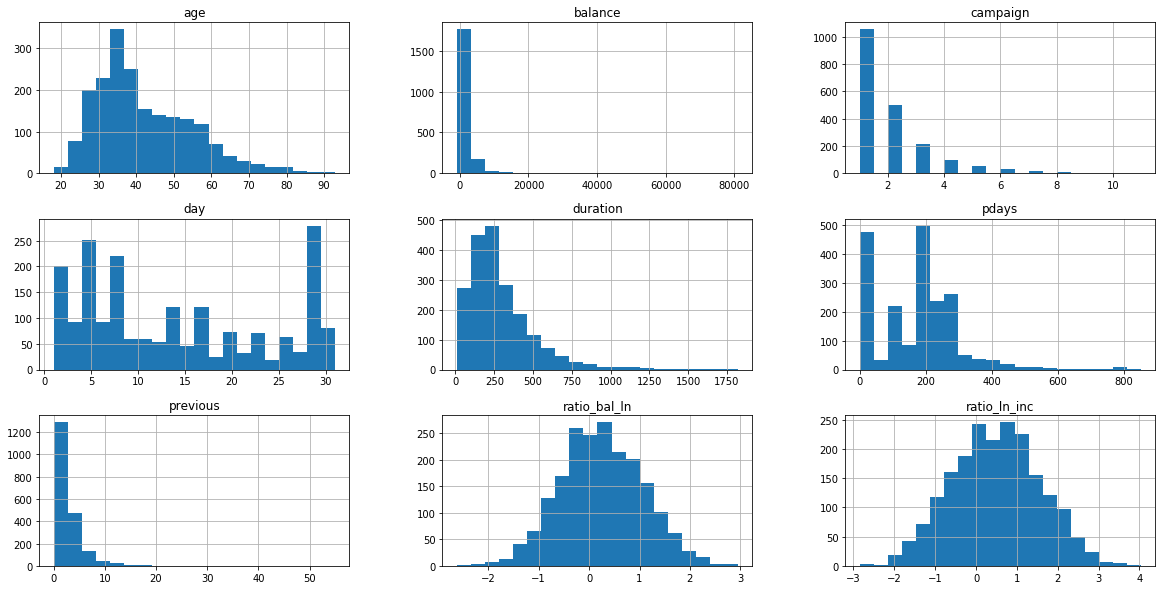

In [28]:
# Distribution of numerical features for the bank data
df.hist(figsize=(20,10), bins=20)
plt.show()

##### Quick observation from Histogram plot show the following:
- Features `age`, `balance`, `duration` have a skewed distribution and we can **apply Logarithmic** or **Power transform** based on the data value ranges to make it more Gaussian-like distribution.
- `campaign`, `day`, `pdays` and `previous` are having discrete values and can be normalized using a scaler
- `ratio_bal_ln` and `ratio_ln_inc` are uniformly distributed and doesn't need any transformation

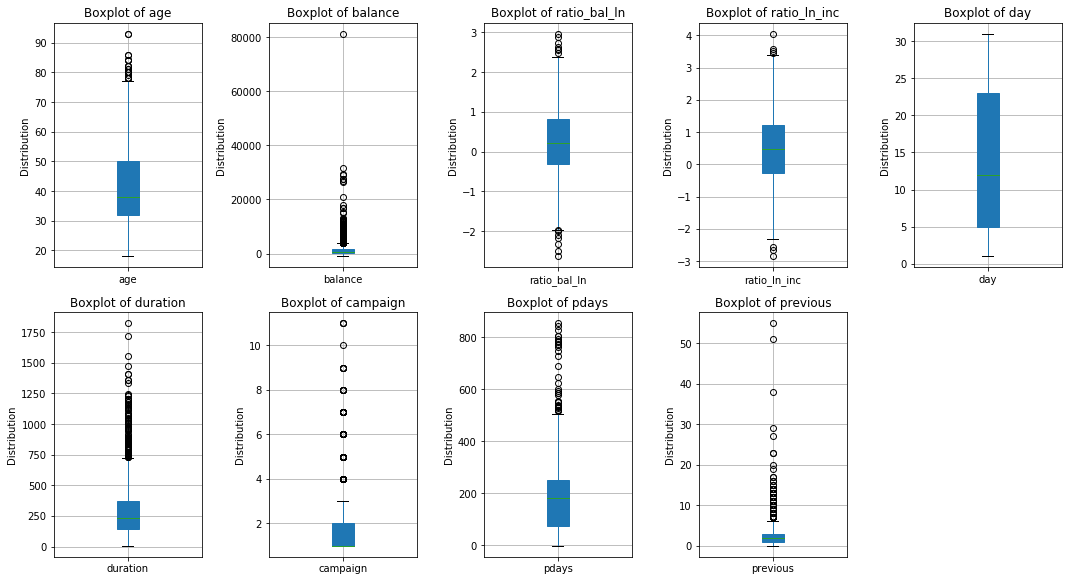

In [29]:
# Find the numeric columns for outlier analysis
numeric_attributes = df.select_dtypes(include=[np.number]).columns.values

# Box plot for all numerical features (Inspired by Michel Danjou's compact implementation)
fig = plt.figure(figsize=(15,20))
for counter, feature in enumerate(numeric_attributes):
    counter +=1
    ax1 = fig.add_subplot(5, 5, counter)
    ax1.set_title("Boxplot of {}".format(feature))
    ax1.set_ylabel('Distribution')
    df.boxplot(column=feature, figsize=(5,25), patch_artist = True)
plt.tight_layout()

##### Quick observation from Box plot shows that :
- Almost all the numeric attributes has some kind of outliers.
- Target candidates for outlier detection are: `balance`, `age`, `duration`

## Outliers in Balance

In [30]:
df.balance.describe()

count     1990.000000
mean      1414.038191
std       3138.455806
min       -980.000000
25%        199.000000
50%        549.000000
75%       1634.750000
max      81204.000000
Name: balance, dtype: float64

Mean for attribute `balance` is 1414 and median is 551, that shows the data is very skewed and presence of some extreme values

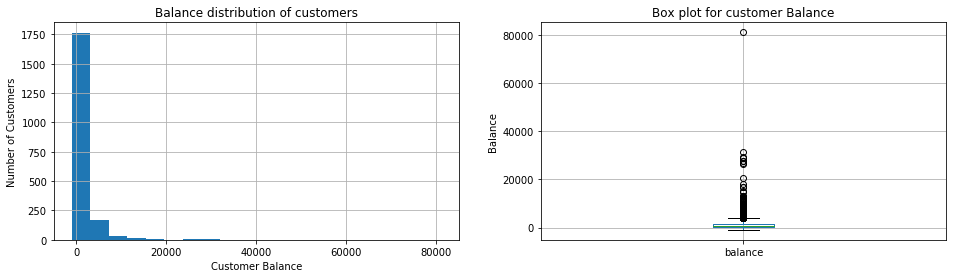

In [31]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot Balance distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Balance distribution of customers")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('Balance')
ax2.set_title("Box plot for customer Balance")
df.boxplot(column='balance')

plt.show()

Histogram on the attribute `balance` shows that the **data is heavily skewed** and does have a normal distribution.
The above box plot shows there are some extreme values with **one customer has a balance of above 80,000**. 

However, since these are bank data I am not sure if it really an outlier. The values seems to be in the valid range from bank data so we would like to keep accurate data. Lets apply [Tukeys IQR)] to get more insight on the outliers.

### Tukey IQR method
Tukey  IQR (interquartile range) method is a robust method for labeling outliers is outlier detection developed by John Tukey. IQR range is the range between the first and the third quartiles (the edges of the box). Tukey considered any data point that fell outside of either 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile to be “outside” or “far out”.

In [32]:
def find_outliers_tukey(x):
    # Define a fucntion to find outlier using Tuckey's IQR range
    # Reusing my last semesters project code for CS4021 
    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [33]:
# Lets find the outliers for Balance using Tuckey's IQR range

tukey_bal_indx, tukey_values = find_outliers_tukey(df['balance'])
print("Balance has {} outliers".format(len(tukey_values)))
print("Balance has outlier of values:", np.sort(tukey_values))

Balance has 159 outliers
Balance has outlier of values: [ 3797  3810  3840  3848  3904  3904  3948  4012  4012  4017  4017  4041
  4071  4112  4124  4126  4168  4176  4189  4243  4243  4256  4256  4279
  4328  4328  4343  4348  4389  4389  4401  4471  4497  4519  4539  4586
  4608  4613  4613  4629  4657  4680  4683  4708  4708  4721  4745  4761
  4787  4831  4833  4867  4873  4945  4951  4961  4984  5000  5021  5037
  5047  5108  5112  5151  5169  5236  5275  5329  5397  5397  5418  5452
  5475  5475  5511  5699  5715  5715  5731  5741  5838  5956  5958  5958
  6027  6036  6046  6101  6138  6181  6203  6322  6384  6403  6411  6495
  6507  6651  6695  6771  6809  7005  7050  7249  7317  7529  7546  7608
  7780  7802  7929  7968  8000  8038  8103  8165  8266  8304  8304  8304
  8304  8332  8626  8876  8876  9001  9299  9367 10583 10600 10861 10861
 11115 11303 11650 11766 11862 12067 12067 12264 12264 12356 12569 12939
 13107 14968 15341 16957 16992 17946 20727 26306 26965 27696 27696 2

**Tukey's method was a bit harsh on the outliers** as we can see the **values from 3797 to 81204 all are considered as outliers**. These might be important data for the bank so we can't just go ahead and remove them.

However, the value 81204 seems to be a very high value, but from the bank's perspective it might be useful. (Forum activity with Chells and post discussion decided to keep the extreme value)

In [34]:
# Minimum values of balance is negative
print(df.balance.min())

df.balance.describe()

-980


count     1990.000000
mean      1414.038191
std       3138.455806
min       -980.000000
25%        199.000000
50%        549.000000
75%       1634.750000
max      81204.000000
Name: balance, dtype: float64

We can see that there is **-ve values in attribute balance**. 

**Log trasform only works with +ve data** and hence we can't use it here. To resolve this we need to use **POWER transform** which can work on -ve and 0 values and make the distribution Gaussian-like. 

### Applying POWER transformation to balance

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
# Since negative values are present the Yeo-Johnson transformed is to be preferred.

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
pt.fit(df['balance'].values.reshape(-1, 1))

df['balance_power'] = pt.transform(df['balance'].values.reshape(-1, 1))

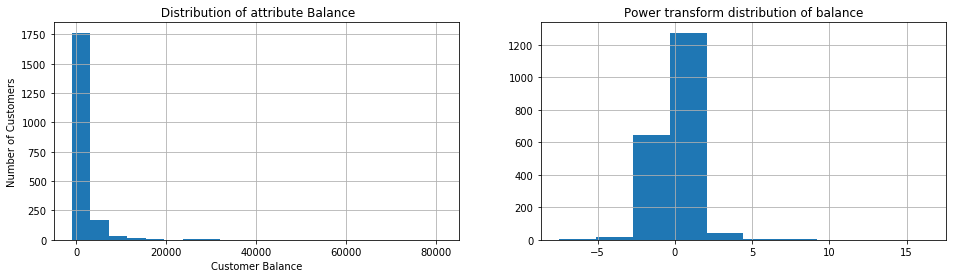

In [36]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot BALANCE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title(" Distribution of attribute Balance")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Distrubtion of balance after appyling Power transform
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Power transform distribution of balance")

df['balance_power'].hist()
plt.show()

#### Observation after Power transform in `balance`:
The histograms show that the new feature `balance_log` have distribution closer to normal than the original feature `balance`

In [37]:
# drop balance as we have power transform of balance (balance_power)
df.drop('balance', axis=1, inplace=True)

## Outlier analysis for AGE

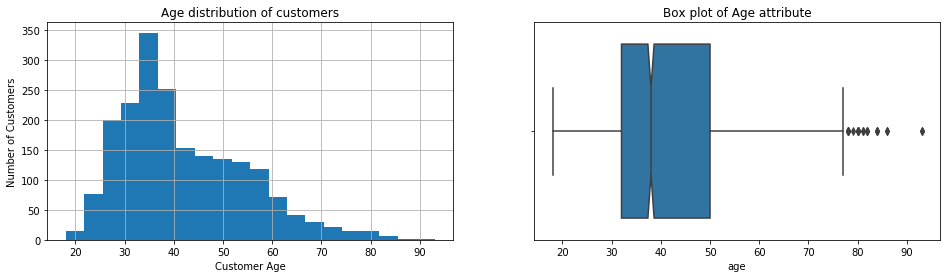

In [38]:
# Create figure with two subplots for AGE attribute
fig = plt.figure(figsize=(16,4))

# Plot AGE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Age distribution of customers")
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Number of Customers')
df['age'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(x='age', data=df, notch=True)
ax2.set_title("Box plot of Age attribute")

plt.show()

Histogram on the attribute `age` shows that the data is a bit skewed on the middle age group and doesn't have a pure normal distribution.
The above box plot shows the possibility of some extreme values as some customers have age in range 77-95 years.

### Analyze the age outlier using Tukey's Interquartile Range Method

In [39]:
# Lets find the outliers for Age using Tuckey's IQR method

tukey_indices, tukey_values = find_outliers_tukey(df['age'])
print("Age has {} outliers".format(len(tukey_values)))
print("Age has outlier of values:", np.sort(tukey_values))

Age has 24 outliers
Age has outlier of values: [78. 78. 78. 78. 78. 79. 80. 80. 80. 80. 80. 80. 81. 81. 82. 82. 82. 84.
 84. 84. 86. 86. 93. 93.]


### Analyze the age outlier using 3 Standard Deviation to Mean method.
Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. We can see from the histogram that `age` has a uniform distribution so we can apply this method.

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples. **3 Standard Deviations from the Mean has 99.7% of the data.**

Reference: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [40]:
def three_standard_dev(data):
    # Function to find outlier using the three standard deviation to mean
    
    # calculate age summary statistics
    age_mean, age_std = np.mean(data), np.std(data)

    # identify outliers
    cut_off = age_std * 3
    lower, upper = age_mean - cut_off, age_mean + cut_off

    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    
    return outliers

In [41]:
# find outlier in AGE using the three standard deviation to mean
age_outliers = three_standard_dev(df['age'])

print("Identified outliers:", len(age_outliers))
print("Identified outlier values:", age_outliers)

Identified outliers: 18
Identified outlier values: [84.0, 86.0, 93.0, 82.0, 80.0, 86.0, 93.0, 82.0, 80.0, 82.0, 80.0, 80.0, 80.0, 84.0, 84.0, 81.0, 80.0, 81.0]


The age values detected as outliers by both Tukey and 3 Standard deviation methods, seems to be in the valid range for `age` as a person can have such age values. So we would like to do keep the values and do log transformation on it.

#### Applying Log transformation to age
The log transformation, a widely used method to address skewed data which solves the problem of non-normal distribution of data. We will be using the log transformation to make data conform to normality.

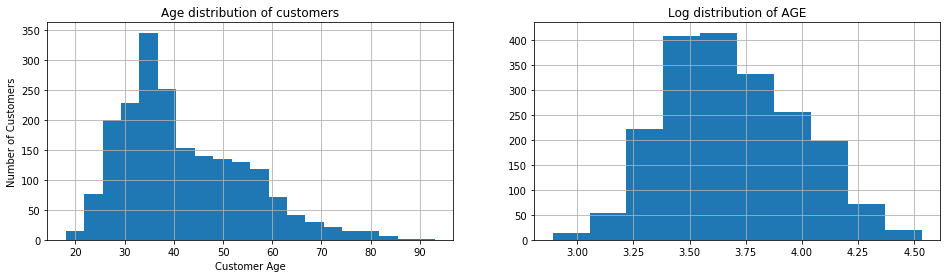

In [42]:
# Create figure with two subplots for AGE attribute
fig = plt.figure(figsize=(16,4))

# Plot AGE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Age distribution of customers")
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Number of Customers')
df['age'].hist(bins=20)

# Use a log transformation to decrease the impact of extreme values in column AGE
ax2 = fig.add_subplot(1, 2, 2)
df['age_log'] = np.log(df['age'])
df['age_log'].hist()
ax2.set_title("Log distribution of AGE")
plt.show()

We can see that **after applying LOG transformation there is uniform distribution in AGE atribute**

#### Lets analyse the impact of LOG transformation on outliers in `age` and `age_log`

In [43]:
# Tuckey IQR on AGE_LOG feature
tukey_indices, _ = find_outliers_tukey(df['age_log'])
print("Tuckey IQR method: AGE_LOG has {} outliers".format(len(tukey_values)))

# find outlier in AGE_LOG using the three standard deviation to mean
age_outliers = three_standard_dev(df['age_log'])

print("3 STD dev to Mean: AGE_LOG has {} outliers:".format(len(age_outliers)))

Tuckey IQR method: AGE_LOG has 24 outliers
3 STD dev to Mean: AGE_LOG has 0 outliers:


### Observations:

We can see the importance of LOG transformation here on the attribute `age`. 
- Before LOG transformation the outlier found in AGE using Tuckey method was: 23 and 3 Std. dev. to mean was : 17
- After LOG transformation the outlier found in AGE_LOG was : 0 using either methods

## Outlier detection in duration

In [44]:
df.duration.describe()

count    1990.000000
mean      291.302513
std       220.505890
min         7.000000
25%       146.000000
50%       236.000000
75%       375.750000
max      1823.000000
Name: duration, dtype: float64

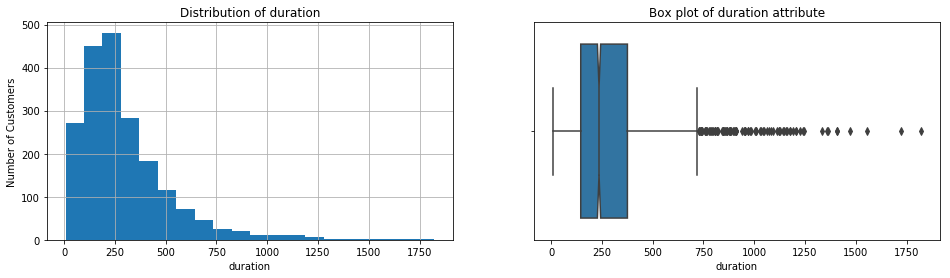

In [45]:
# Create figure with two subplots for duration attribute
fig = plt.figure(figsize=(16,4))

# Plot duration distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of duration")
ax1.set_xlabel('duration')
ax1.set_ylabel('Number of Customers')
df['duration'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(x='duration', data=df, notch=True)
ax2.set_title("Box plot of duration attribute")

plt.show()

#### Observation on the plots:
From the histogram we can see that the attribute **duration is very skewed on the lower side of the histogram and qualifies for a LOG Transformation**

The box plot shows potential outliers being present in `duration`. I will analyze this using the 3 standard deviation approach with before and after the Log transformation.

In [46]:
# Outlier detection on raw data of duration:

# find outlier in AGE using the three standard deviation to mean
duration_outliers = three_standard_dev(df.duration)

print("Identified outliers BEFORE Log tranformation:", len(duration_outliers))
print("Identified outlier values:", duration_outliers)

Identified outliers BEFORE Log tranformation: 43
Identified outlier values: [957, 1074, 1156, 1823, 1160, 1047, 1121, 1026, 1007, 982, 1472, 1093, 1143, 1241, 1064, 1363, 1226, 1120, 968, 1148, 1193, 957, 1005, 967, 1008, 1360, 1207, 1720, 1407, 1205, 1114, 1178, 1127, 1556, 977, 1176, 1032, 1246, 1405, 1042, 1081, 953, 1334]


### Applying Log transformation to duration to make the distribution uniform/Gaussian

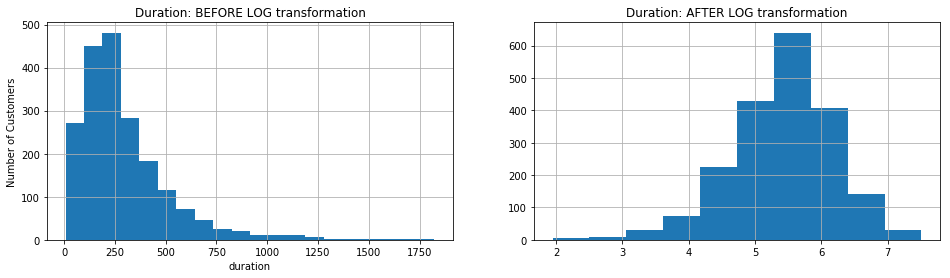

In [47]:
# Create figure with two subplots for duration attribute
fig = plt.figure(figsize=(16,4))

# Plot duration distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Duration: BEFORE LOG transformation")
ax1.set_xlabel('duration')
ax1.set_ylabel('Number of Customers')
df['duration'].hist(bins=20)

# Use a log transformation to decrease the impact of extreme values in column AGE
ax2 = fig.add_subplot(1, 2, 2)
df['duration_log'] = np.log(df['duration'])
df['duration_log'].hist()
ax2.set_title("Duration: AFTER LOG transformation")
plt.show()

We can see that **after LOG transformation the duration attribute is more uniformly distributed**

In [48]:
# Outlier detection AFTER LOG transformation of duration:

# find outlier in AGE using the three standard deviation to mean
duration1_outliers = three_standard_dev(df.duration_log)

print("Identified outliers AFTER Log tranformation:", len(duration1_outliers))
print("Identified outlier values:", duration1_outliers)

Identified outliers AFTER Log tranformation: 17
Identified outlier values: [2.833213344056216, 2.0794415416798357, 2.1972245773362196, 2.772588722239781, 1.9459101490553132, 2.772588722239781, 2.0794415416798357, 2.3978952727983707, 2.70805020110221, 2.4849066497880004, 1.9459101490553132, 2.5649493574615367, 2.995732273553991, 2.6390573296152584, 2.995732273553991, 3.044522437723423, 3.044522437723423]


#### Observation on Outliers in `duration` and `duration_log`:
The outliers detected before and after applying the log transformation for attribute `duration` has a big difference. 

This is because the **distribution is more Gaussian-life after applying the Log transformation** and hence applying the 3 standard deviation approach shows less outliers.

I am deciding not to remove the outliers for `duration` or `duration_log`

*************************************

# Task 3 (CS5062): Feature creation

*Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.*

Feature / Variable creation is a process to generate a new variables / features based on existing variable(s). We need to do a mixture of aggregating or combining features to create new features, and decomposing or splitting features to create new features. Two goals of feature generation can be dimensionality reduction and accuracy improvement.

### Correlation  matrix to find any correlation between numerical features

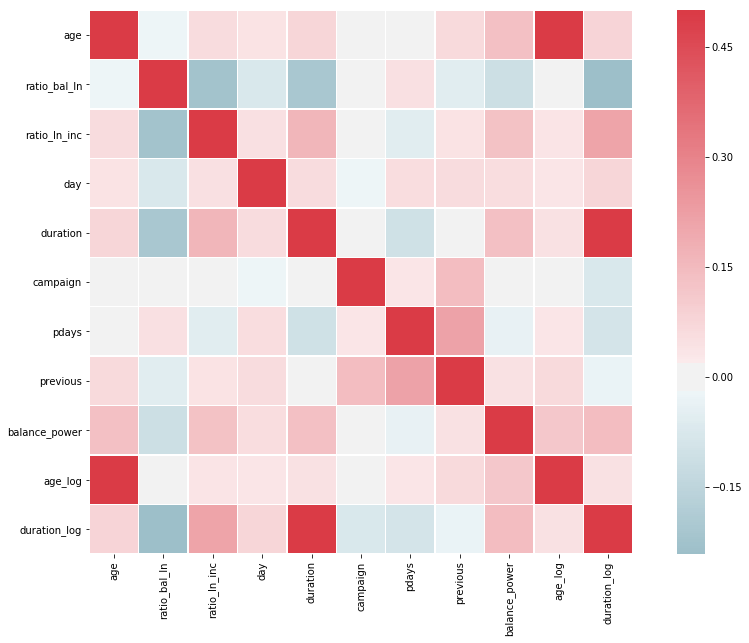

In [49]:
f, ax = plt.subplots(figsize=(16, 10))

# Compute the correlation matrix
# Reference: (https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
corr = df.corr()

# Generate a mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, linewidths=.5)
plt.show()

### Observation:
Nothing obvious from the correlation map, except `pdays` and `previous` shows some level of correlation. The age/duration with age_log/duration_log are expected to show high correlation as they are derived from th same data by applying transformation.

Note: PCA should help in figuring out if there is any strong correlation between features. I haven't used PCA here as it not necessary for this etivity.

In [50]:
df.head()

,age,job,marital,education,default,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,subscribed,balance_power,age_log,duration_log
0,32.0,technician,single,tertiary,no,1.300134,0.473895,yes,no,cellular,...,apr,957,2,131,2,failure,no,-0.286402,3.465736,6.863803
1,39.0,technician,divorced,secondary,no,-0.193701,0.237021,yes,yes,cellular,...,apr,233,2,133,1,failure,no,-0.141894,3.663562,5.451038
2,59.0,retired,married,secondary,no,1.334266,0.121981,yes,yes,cellular,...,apr,126,2,239,1,failure,no,0.010880,4.077537,4.836282
3,47.0,blue-collar,married,secondary,no,0.362286,1.251328,yes,yes,cellular,...,apr,274,1,238,2,failure,no,-0.283277,3.850148,5.613128
4,54.0,retired,married,secondary,no,0.072075,-0.533738,yes,no,cellular,...,apr,479,1,307,1,failure,no,-0.002253,3.988984,6.171701


#### Feature creation options used:
- Binning the age values into groups and creating **age_binned**
- Using grouped `age_binned` with `marital` status [getting life stage of age group]
- Grouping various job categories to appropriate groups
- Merge attributes `housing` and `loan` as **has_loan**

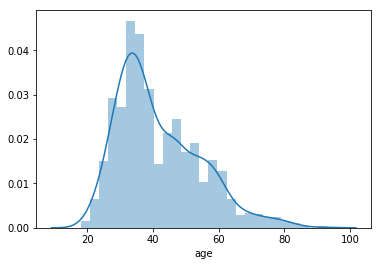

In [51]:
# Plotting the Age distribution
sns.distplot(df.age)

#### From the Histogram plot, 
- The histogram shows most of the customers are in the **age group 25-60 years** and hints thats the **working class age group was targeted by the bank**

#### We can group/bin the age categories as per the distribution

In [52]:
# AGE Group creation
# Reference: https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe

# Creating the age group with appropriate bins
bins = [0, 18, 36, 65, np.inf]
age_groups = ['young', 'lower_middle', 'middle', 'senior']

# Break the age groups into 4 parts and assign group names
df['age_binned'] = pd.cut(df['age'], bins, labels=age_groups)

df['age_binned'].value_counts()

middle          1031
lower_middle     862
senior            96
young              1
Name: age_binned, dtype: int64

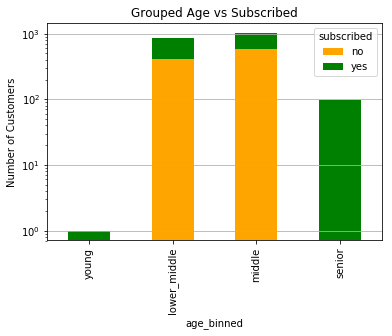

In [53]:
# Age binned vs subscribed analysis

stacked_chart = pd.crosstab(df['age_binned'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['orange', 'green'])
plt.title("Grouped Age vs Subscribed")
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.yscale('log')
plt.show()

# Note: The output seems to mismatch the row names with crosstab after using qcut [with pandas ver 23]
# I had to upgrage to pandas 23.2 to get around this, link shared below
# (https://stackoverflow.com/questions/51461836/pandas-crosstab-when-used-with-pandas-cut-row-names-of-the-output-crosstab-are)

### Observation:
We can see that after we grouped the age into 4 categories, the **young and senior customers has almost 100% subscription**

### New Feature "life_stage": Based on age_binned and marital status

In [54]:
# Getting life stage of age group
df['life_stage'] = df.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
df['life_stage'].value_counts()

middle & married           733
lower_middle & single      521
lower_middle & married     300
middle & divorced          151
middle & single            147
senior & married            72
lower_middle & divorced     41
senior & divorced           23
senior & single              1
young & single               1
Name: life_stage, dtype: int64

### Observation:
We can see some really interesting facts out of the above grouping:
- Middle aged Customers with marital status as married has the highest number (772)
- Second highest customers are in lower middle age category and single (795)
- There is only 1 customer who is young and single & senior and single

In [55]:
# Drop age and marital status as we will be using the new feature "life stage" from now
df.drop(['age', 'age_log', 'age_binned', 'marital'], axis=1,inplace = True)

#### Grouping job categories of relevant fields

In [56]:
# Combine similar jobs into categories
# Used wikipedia to understand job types and grouped accordingly

# A white-collar worker is a person who performs professional, managerial, or administrative work. 
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')

# Pink collar include jobs in the beauty industry, nursing, teaching, secretarial work, waitressing, or child care.
df['job'] = df['job'].replace(['services','housemaid'], 'pink-collar')

df['job'] = df['job'].replace(['student', 'unemployed', 'unknown'], 'other')

In [57]:
# New Job value counts
df.job.value_counts()

white-collar     708
technician       348
blue-collar      298
pink-collar      200
other            165
retired          162
self-employed     64
entrepreneur      45
Name: job, dtype: int64

### New feature "has_loan" by grouping "housing" and personal "loan" 

In [58]:
df.housing.value_counts()

no     1029
yes     961
Name: housing, dtype: int64

In [59]:
df.loan.value_counts()

no     1740
yes     250
Name: loan, dtype: int64

In [60]:
# Defining a function to merge housing and personal loans

def merge_loans(data):   
    if (data['housing'] == 'yes') or (data['loan'] == 'yes'):
        return 1
    else:
        return 0

In [61]:
# Create a new feature has_loan from hosuing and loan attrbiutes
df['has_loan'] = df.apply(merge_loans, axis=1)

# Drop housing and loan attributes from bank data frame
df.drop('housing', axis=1, inplace = True)
df.drop('loan', axis=1, inplace = True)

df.has_loan.value_counts()

1    1041
0     949
Name: has_loan, dtype: int64

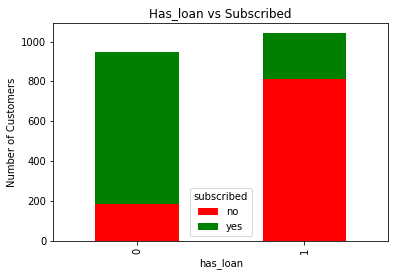

In [62]:
# Has_loan vs subscribed
stacked_chart = pd.crosstab(df['has_loan'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title("Has_loan vs Subscribed")
plt.ylabel('Number of Customers')
plt.show()

### Observation:
Customers that have either personal loan or housing loan has been combined here into one feature as `has_loan`.
- We can see that customers with `has_loan` feature has less chance to get subscribed to bank marketing campaign.

Dropping some columns which doesn't seem important

In [63]:
# Drop 'contact', as every participant has been contacted. 
df.drop('contact', axis=1, inplace=True)

# Drop 'month' and 'day' as they don't have any intrinsic meaning
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

# Drop duration as we have log tranform of that
df.drop('duration', axis=1, inplace=True)

### Convert categorical values to numeric by  using label_encoder

In [64]:
# Convert Output variable "subscribed" in numeric
y_encoded = df['subscribed'].map({'yes': 1, 'no': -1})
df.drop('subscribed', axis=1, inplace=True)

In [65]:
## Using label encoder Convert the categorical variables and to reduce number of feature columns!

labelEnc=LabelEncoder()

categorical_variables = df.select_dtypes(include=['O']).columns.values
print(categorical_variables)

for feature in categorical_variables:
    df[feature]=labelEnc.fit_transform(df[feature])

print(df.shape)
df.head()

['job' 'education' 'default' 'poutcome' 'life_stage']
(1990, 13)


,job,education,default,ratio_bal_ln,ratio_ln_inc,campaign,pdays,previous,poutcome,balance_power,duration_log,life_stage,has_loan
0,6,2,0,1.300134,0.473895,2,131,2,0,-0.286402,6.863803,2,1
1,6,1,0,-0.193701,0.237021,2,133,1,0,-0.141894,5.451038,3,1
2,4,1,0,1.334266,0.121981,2,239,1,0,0.010880,4.836282,4,1
3,0,1,0,0.362286,1.251328,1,238,2,0,-0.283277,5.613128,4,1
4,4,1,0,0.072075,-0.533738,1,307,1,0,-0.002253,6.171701,4,1


In [66]:
# Show all available features for training
features = df.select_dtypes(include=[np.number]).columns.values
print("Features Available: ", len(features))
print("Features:", features)

Features Available:  13
Features: ['job' 'education' 'default' 'ratio_bal_ln' 'ratio_ln_inc' 'campaign'
 'pdays' 'previous' 'poutcome' 'balance_power' 'duration_log' 'life_stage'
 'has_loan']


### Analysis of Feature importance using Extra Trees Classifier

In [67]:
# Select the Generated New features and other numeric features for training the model
# (Aiden suggested to use a subset of features to make model simple as more features can lead to complex models)

# compute the feature importances
model = ExtraTreesClassifier(n_estimators=100)
model.fit(df[features], y_encoded)
feature_imp = model.feature_importances_

feature_tree = pd.DataFrame({'FEATURE':df[features].columns.values,'IMPORTANCE':feature_imp})
feature_tree.sort_values(by=['IMPORTANCE'], ascending=False)

,FEATURE,IMPORTANCE
12,has_loan,0.236510
8,poutcome,0.231686
10,duration_log,0.099857
4,ratio_ln_inc,0.093087
3,ratio_bal_ln,0.091027
6,pdays,0.072082
9,balance_power,0.037048
11,life_stage,0.036788
0,job,0.033572
7,previous,0.027215


#### Observation:
The above table shows the important features which can affect the model training.
- We can see that the **top 5 features are "poutcome","has_loan","duration_log","ratio_bal_ln","ratio_ln_inc", "pdays"**

In [68]:
# Select the FINAL features based on importance
final_features = ["poutcome","has_loan","duration_log","ratio_bal_ln","ratio_ln_inc", "pdays"]

#final_features = features
print("Final Features selected:", final_features)

Final Features selected: ['poutcome', 'has_loan', 'duration_log', 'ratio_bal_ln', 'ratio_ln_inc', 'pdays']


# Task 4 (CE6002)

*Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.*

*Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.*

In [69]:
X = df[final_features].values
y = y_encoded.values

# Split the dataset in train and test set with [train:test data = 80:20 ratio]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print("X_train shape", X_train.shape )
print("X_test shape",  X_test.shape )
print("y_train shape", y_train.shape )
print("y_test shape",  y_test.shape )

X_train shape (1592, 6)
X_test shape (398, 6)
y_train shape (1592,)
y_test shape (398,)


### Logistic Regression

In [71]:
# Example Code referred from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# Run Logistic Regression on the dataset to compare with performance achieved using Pocket algorithm
logistic_reg = LogisticRegression(solver='lbfgs', max_iter=250)

# Fit the classifier to training dataset
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=250, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Make predictions and calculate Ein and Eout

In [72]:
# Make Prediction on test data
prediction = logistic_reg.predict(X_test)
predict_proba = logistic_reg.predict_proba(X_test) 

# Ein on train data: 1 - log_reg_score(train)
Ein = 1 - logistic_reg.score(X_train, y_train)

# Eout on test data: 1 - log_reg_score(test)
Eout = 1 - logistic_reg.score(X_test, y_test)

print("Logistic Regression Performance:")
print("**"*20)
print("Ein:  {:.3f}".format(Ein))
print("Eout: {:.3f}".format(Eout))

print("**"*20)
print('Accuracy on train data: {:.2f}'.format(logistic_reg.score(X_train, y_train)))
print('Accuracy on test data: {:.2f}'.format(logistic_reg.score(X_test, y_test)))
print("**"*20)

Logistic Regression Performance:
****************************************
Ein:  0.079
Eout: 0.088
****************************************
Accuracy on train data: 0.92
Accuracy on test data: 0.91
****************************************


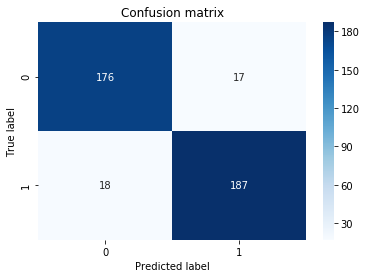

In [73]:
# Lets see the confusion matrix to undestand the miss-classifications
from sklearn.metrics import confusion_matrix

y_pred = logistic_reg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Plotting the Error P[Ein-Eout|>e] , Hoeffding bound and the VC bound

In [74]:
# Plot Probabilities and Hoeffding Bound by Reusing Excercise from Week 1

plt.style.use('default')

def run_experiment(X, y, hypothesis, iterations):
    # Function to plot the Hoeffding bound
 
    Eins = np.empty(iterations)
    Eouts = np.empty(iterations)
    error_diff = []
    test_size = 0.2

    # For loop to find Ein and Eout for each train and test set for each iteration
    for i in range(iterations):
        
        # Split and shuffle the data as 80% train and 20% test data 
        X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=test_size)           
        
        # Substract hypothesis scores from 1 on train and test data to get Ein/Eout
        Ein = 1 - hypothesis.score(X_train, y_train)
        Eout = 1 -  hypothesis.score(X_test, y_test)
        Eins[i] = Ein
        Eouts[i] = Eout
        error_diff.append(abs(Ein - Eout))

    # Find the average Ein and Eout
    Ein_mean = Eins.mean()
    Eout_mean = Eouts.mean()

    # The value of N has to be the size of the training set
    N = len(X_train)
    
    # The VC dimension: dvc=d+1; d is the dimensionality of the input train data
    dvc = X_train.shape[1] + 1

    plt.figure(figsize=(10,6))
    
    # Plot probabilities for N    
    prob_epsilon=[]
    epsilons = np.arange(0.001, 0.2, 0.001)
    for e in epsilons:
        prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))

    # Plot Probability of epsilon curve
    plt.plot(epsilons, prob_epsilon, 'b-', label="P[abs(Ein-Eout)>e]")

    # Plot Hoeffding bound for N 
    hoeffding = [2*math.exp(-2*N*e**2) for e in epsilons]
    plt.plot(epsilons, hoeffding, 'r-', label="Hoeffding bound")

    # Plot VC bound for N 
    vc = [4*((2*N)**dvc+1)*math.exp(-(N/8)*e**2) for e in epsilons]
    #vc = [4*((2*N)**dvc+1)*math.exp(-(N/8)*e**2) for e in epsilons]

    plt.plot(epsilons, vc, 'g-', label="VC bound")

    print("**"*40)
    print('Experiment parameters are:\nN= {}\nIterations={}\nEin={:.2f} Eout={:.2f}'.
          format(N, iterations, Ein_mean, Eout_mean))
    
    print("**"*40)
    print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoeffding))>0 else 
          "Error does not exceed Hoeffding")
    
    print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")
    print("**"*40)
   
    plt.title("Comparision of the Probability of epsilon vs Hoefdding and VC Bounds, Iteration={}".format(iterations))
    plt.legend(loc='best')
    plt.xlabel('Epsilon')
    # Scaling to log on y-axis to show all the 3 plots clearly
    plt.yscale('log')
    plt.show()

#### Run the experiment for multiple Iterations (1, 100 and 1000) and analyse the results

********************************************************************************
Experiment parameters are:
N= 1592
Iterations=1
Ein=0.08 Eout=0.08
********************************************************************************
Error does not exceed Hoeffding
Error does not exceed VC
********************************************************************************


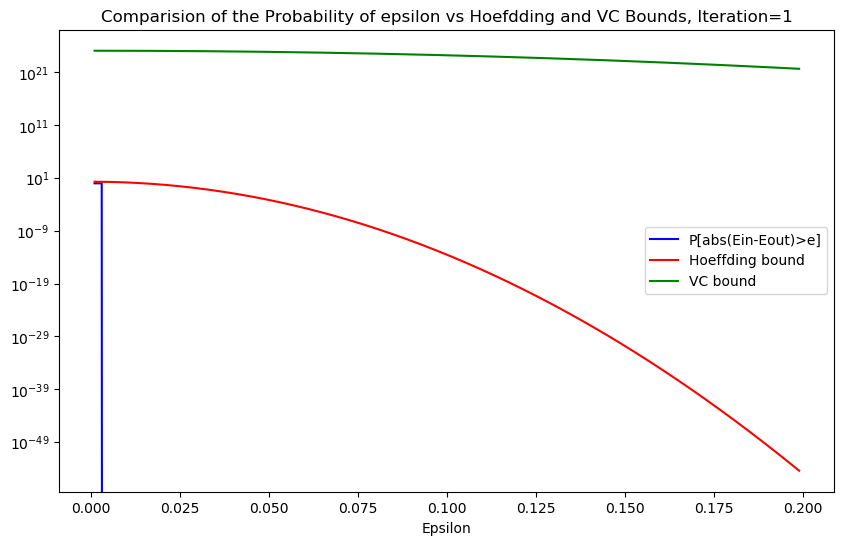

In [75]:
# Call the function to run the experiment to calculate and plot Error w.r.t. Hoeffding and VC bound (1 iterations)

iteration = 1
run_experiment(X=X, y=y, hypothesis=logistic_reg, iterations=iteration)

********************************************************************************
Experiment parameters are:
N= 1592
Iterations=100
Ein=0.08 Eout=0.08
********************************************************************************
Error exceeds Hoeffding
Error does not exceed VC
********************************************************************************


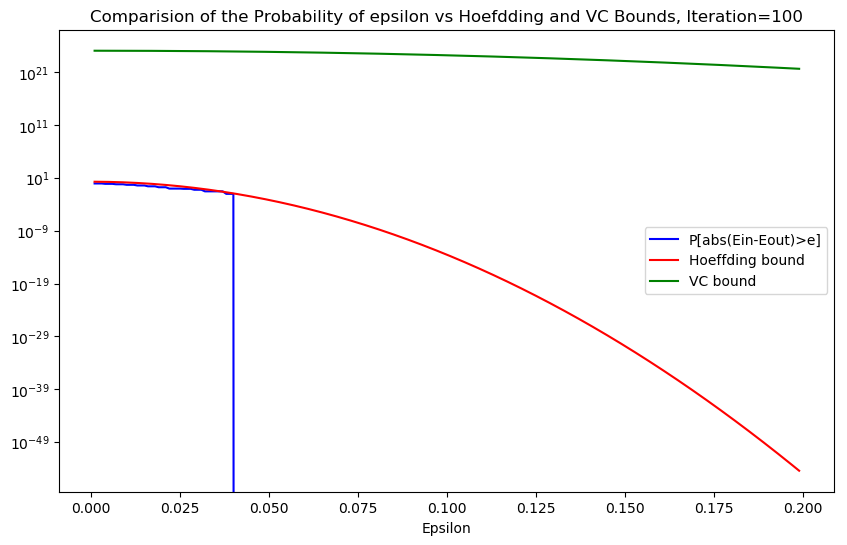

In [76]:
# Call the function to run the experiment to calculate and plot Error w.r.t. Hoeffding and VC bound (100 iterations)

iteration = 100
run_experiment(X=X, y=y, hypothesis=logistic_reg, iterations=iteration)

********************************************************************************
Experiment parameters are:
N= 1592
Iterations=1000
Ein=0.08 Eout=0.08
********************************************************************************
Error exceeds Hoeffding
Error does not exceed VC
********************************************************************************


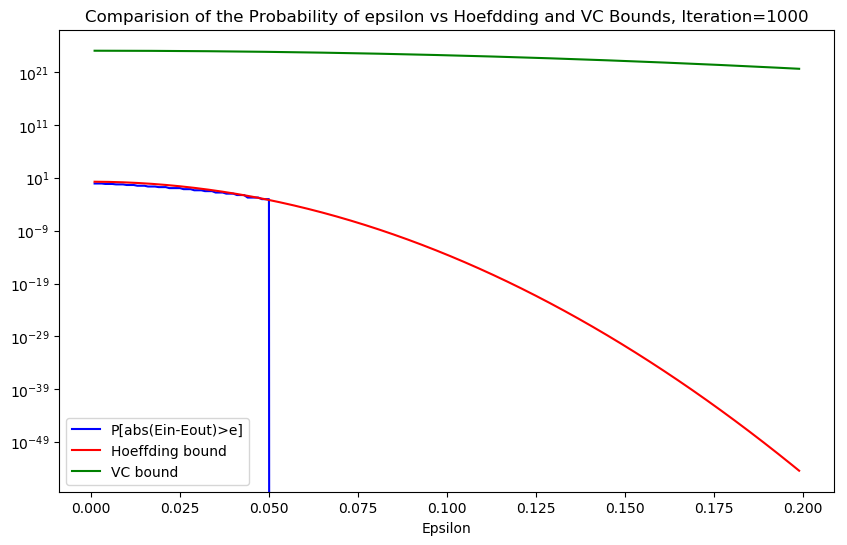

In [77]:
# Run the experiment to calculate and plot Error w.r.t. Hoeffding and VC bound (1000 iterations)

iteration = 1000
run_experiment(X=X, y=y, hypothesis=logistic_reg, iterations=iteration)

### Task 4 - Observation and Conclusion:

As we increase the number of iterations, the **Error is not always within the Hoeffding Bound and breaks the Hoeffding Inequality**. This is however not the case with VC bound, as **the error is always within the VC Bound** because the VC bound is quite loose in general. 

This shows thats **Hoeffding bound doesn't always apply true for learning and VC bound does apply.** 

**Learning is feasible using the VC Bound** as its uses a polynomial growth function to which reduces the number of hypothesis from M (which can be infinite in Hoeffding) to a finite number of hypothesis. The VC Generalization bound establishes the feasibility of learning with infinite hypothesis sets. Ideally **machine learning models with lower dvc tend to generalize better than those with higher dvc·**

# Task 5 (CE6002)
*Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.*

*Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.*

### Learning Curves
A learning curve shows how error changes as the training set size increases. It gives a visualization on how fast the model learns and whether the whole analysis is not stuck in local minima.

Learning curves give us an opportunity to diagnose bias and variance in supervised learning models.

Reference: 
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
2. https://www.dataquest.io/blog/learning-curves-machine-learning/
3. https://towardsdatascience.com/measuring-the-power-of-a-classifier-c765a7446c1c

In [78]:
# Using classic style for the learning curves
# Reference: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
plt.style.use('classic')

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
    # Generate a simple plot of the test and training learning curve.

    # Set some parameters for learning curve
    n_jobs = 2
    train_sizes=np.linspace(.1, 1.0, 5)
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Determine the cross-validated training and test scores for different training set sizes.
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, 
                                                            y, 
                                                            cv=cv, 
                                                            n_jobs=n_jobs,
                                                            shuffle=True,
                                                            train_sizes=train_sizes,
                                                            random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    print("Mean Training Scores: ", train_scores_mean)
    print("Mean Cross-validation Scores: ", test_scores_mean)
    
    # Plot the mean train and test scores
    plt.plot(train_sizes, train_scores_mean, 'ro--', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'go--', label= "CV score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
        
    plt.grid()
    plt.legend(loc="best")
    return plt

Mean Training Scores:  [0.90708661 0.90849879 0.91001429 0.91209939 0.91408484]
Mean Cross-validation Scores:  [0.88815047 0.90539185 0.90877743 0.91134796 0.91316614]


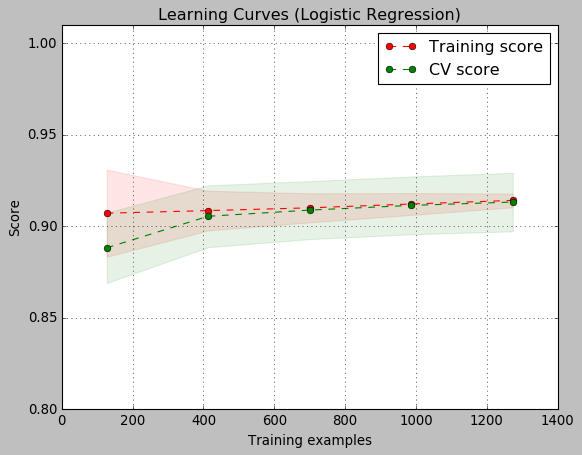

In [79]:
title = "Learning Curves (Logistic Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.8, 1.01), cv=cv)
plt.show()

### Observations from the Logistic Regression classifier Learning Curve:

The gap between the two curves converges as the number of training samples are increasing. Another way of interpreting this is that Ein tracks Eout as the score are converging with the number of training samples.

This signifies that the **Logistic Regression classifier generalizing well on the dataset.**

Mean Training Scores:  [0.90354331 0.89946731 0.89845714 0.89923935 0.89959937]
Mean Cross-validation Scores:  [0.89031348 0.89630094 0.89702194 0.89802508 0.8977116 ]


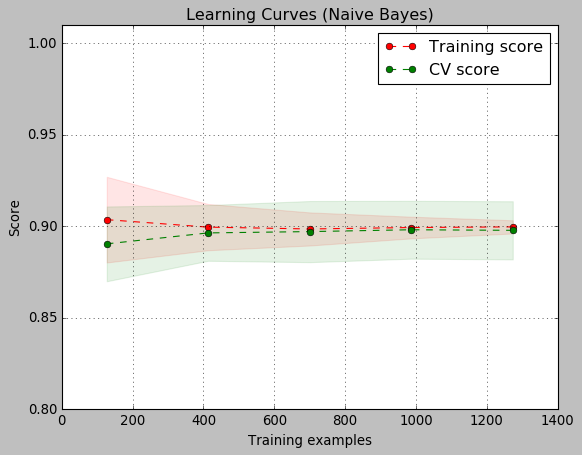

In [80]:
title = "Learning Curves (Naive Bayes)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.8, 1.01), cv=cv)
plt.show()

### Observations from the Naive Bias classifier Learning Curve:
The gap between the two curves converges as the number of training samples are increasing. Another way of interpreting this is that Ein tracks Eout as the score are converging with the number of training samples.

This signifies that the **Naive Bias classifier is a simple model and generalizing well on the dataset.**

Mean Training Scores:  [0.98031496 0.96755448 0.96485714 0.9637931  0.9624509 ]
Mean Cross-validation Scores:  [0.80094044 0.85956113 0.88087774 0.89811912 0.90031348]


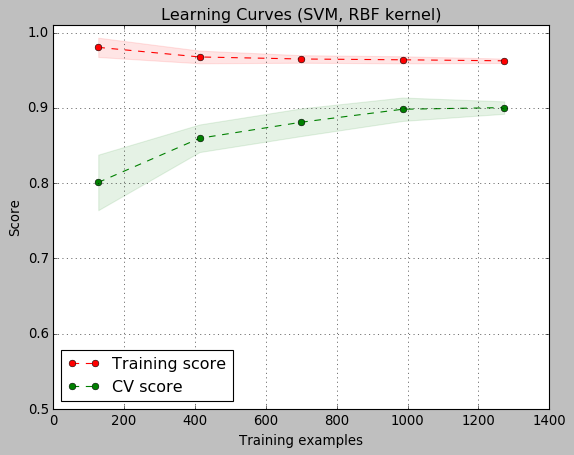

In [81]:
title = "Learning Curves (SVM, RBF kernel)"

# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = SVC(kernel='rbf')
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv)
plt.show()

### Observations from the SVC Learning Curve:

- High Variance in SVC with RBF kernel: Overfitting curves

The learning curve for Support vector machine with RBF kernel shows a **high score for Training data** but a **low score for Cross validation data**. 

This tells us that the **model is fitting too well on training data and have a very low In-sample error (Ein)**. Now, the **cross validation score is low which relates to high out-sample error (Eout)** and `Eout is not able to track Ein`.

This is a case of **Low Bias and High variance problem** and the **SVC model is overfitting**  which makes the model difficult to Generalize on test data. 

This shows that a simpler model, like Gaussian Naive Bias, perform better for this dataset as compared to a complex SVC. Another option can be to *use more training samples* (to reduce the gap in in the plot to get convergence) and *hyper-parameter tuning* to make the model generalize better.

Mean Training Scores:  [1.         0.97493947 0.95648571 0.95017241 0.94692852]
Mean Cross-validation Scores:  [0.87824451 0.9138558  0.92097179 0.92338558 0.92689655]


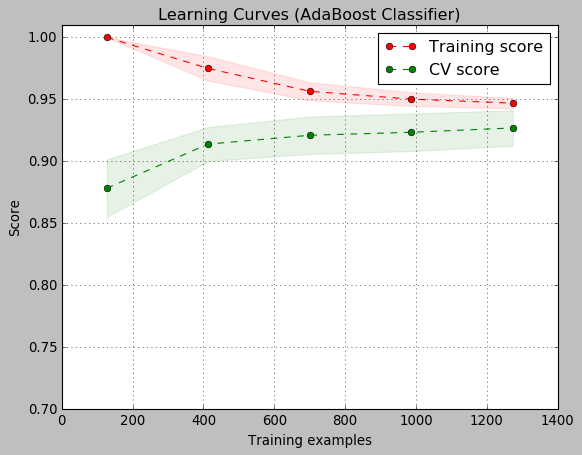

In [82]:
from sklearn.ensemble import AdaBoostClassifier

title = "Learning Curves (AdaBoost Classifier)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = AdaBoostClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv)
plt.show()

### Observations from the AdaBoost Classifier Learning Curve:

When we have a small training set the training and cross-validation curves doesn't generalize well. But as training set grows the hypothesis shows signs to generalize better. This shows that the Ada-boost classifier is a complex model!

# Conclusions:

The VC dimension is measuring the 'effective' number of parameters. The more parameters a model has, the more diverse its hypothesis set is, which is reflected in a larger value of the growth function mH (N). The VC dimension measures these eﬀective parameters or 'degrees of freedom' that enable the model to express a diverse set of hypotheses. With enough data, each and every hypothesis in an infinite Hypothesis set with a finite VC dimension will generalize well from Ein to Eout. 

The **complexity of a classification algorithm is directly related to its VC dimension** and also links to the trade-off between bias and variance. **As the complexity increases, we transition from underfitting to overfitting.** 

Generally, **a model with a higher VC dimension will require more training data to properly train**, but will be able to identify more complex relationships in the data.

**A low complexity model will have a high bias and low variance** while having a low expressive power leading to high bias, it is also very simple, so it has very predictable performance leading to a low variance. 

**A complex model will have a lower bias since it has more expressiveness** while having a higher variance as there are more parameters to be tuned based on the sample training data. 


**Adding complexity is good up until a certain point**, after which the classifier begins to overfit on the training data. We should aim to choose a classifier with a level of complexity that is just enough for the classification task or else we can end up in underfitting or overfitting the model.

